In [110]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('C:/Users/ashfa/Desktop/breast cancer/breast_cancer.xlsx')
df

,SubjectNo,PatientID,Age,Weight,Height,Parity,NoOfChildren,MenopausalStatus,AgeAtMenarche,AgeAtMenopause,UseOfHRT,FamilyHystory,Binary
0,1,CP_01,40,50.00,1.65,Parouse,2,Premenopausal,13,NaN,No,No,0
1,2,CP_02,55,70.20,1.58,Parouse,3,Postmenopausal,14,42.0,No,No,0
2,3,CP_03,51,41.25,1.46,Parouse,2,Premenopausal,14,NaN,No,No,1
3,4,CP_04,45,70.50,1.64,Parouse,1,Premenopausal,14,NaN,No,No,1
4,5,CP_05,50,60.90,1.49,Parouse,3,Premenopausal,12,NaN,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,NW_42,65,70.00,1.50,Parouse,2,Postmenopausal,13,51.0,No,No,0
239,240,NW_43,55,56.00,1.52,Nulliparouse,0,Postmenopausal,12,41.0,No,No,0
240,241,NW_44,40,65.00,1.48,Parouse,2,Postmenopausal,12,35.0,No,No,0
241,242,NW_45,45,53.00,1.40,Parouse,3,Premenopausal,12,NaN,Yes,No,1


In [3]:
df.shape

(243, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               243 non-null    int64  
 1   Weight            243 non-null    float64
 2   Height            243 non-null    float64
 3   Parity            243 non-null    int64  
 4   NoOfChildren      243 non-null    int64  
 5   MenopausalStatus  243 non-null    int64  
 6   AgeAtMenarche     243 non-null    int64  
 7   AgeAtMenopause    243 non-null    float64
 8   UseOfHRT          243 non-null    int64  
 9   FamilyHystory     243 non-null    int64  
 10  Binary            243 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 21.0 KB


In [6]:
df.count()

SubjectNo           243
PatientID           243
Age                 243
Weight              243
Height              243
Parity              243
NoOfChildren        243
MenopausalStatus    243
AgeAtMenarche       243
AgeAtMenopause      129
UseOfHRT            243
FamilyHystory       243
Binary              243
dtype: int64

In [5]:
df.describe()

,SubjectNo,Age,Weight,Height,NoOfChildren,AgeAtMenarche,AgeAtMenopause,Binary
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,129.000000,243.000000
mean,122.000000,51.584362,61.865144,1.541564,2.205761,13.456790,48.193798,0.185185
std,70.292247,8.928324,11.042376,0.082722,1.142189,1.502472,4.491446,0.389249
min,1.000000,35.000000,32.550000,1.220000,0.000000,10.000000,35.000000,0.000000
25%,61.500000,45.000000,53.875000,1.495000,2.000000,12.000000,45.000000,0.000000
50%,122.000000,51.000000,61.000000,1.530000,2.000000,13.000000,49.000000,0.000000
75%,182.500000,58.000000,69.035000,1.580000,3.000000,14.000000,51.000000,0.000000
max,243.000000,78.000000,106.000000,1.990000,6.000000,18.000000,57.000000,1.000000


In [7]:
df.isnull().sum()

SubjectNo             0
PatientID             0
Age                   0
Weight                0
Height                0
Parity                0
NoOfChildren          0
MenopausalStatus      0
AgeAtMenarche         0
AgeAtMenopause      114
UseOfHRT              0
FamilyHystory         0
Binary                0
dtype: int64

# Develop Classes and Feature Scaling

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [9]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns, errors='ignore')

In [10]:
dropper = DropColumns(columns=["SubjectNo", "PatientID"])
df = dropper.fit_transform(df)

In [11]:
df

,Age,Weight,Height,Parity,NoOfChildren,MenopausalStatus,AgeAtMenarche,AgeAtMenopause,UseOfHRT,FamilyHystory,Binary
0,40,50.00,1.65,Parouse,2,Premenopausal,13,NaN,No,No,0
1,55,70.20,1.58,Parouse,3,Postmenopausal,14,42.0,No,No,0
2,51,41.25,1.46,Parouse,2,Premenopausal,14,NaN,No,No,1
3,45,70.50,1.64,Parouse,1,Premenopausal,14,NaN,No,No,1
4,50,60.90,1.49,Parouse,3,Premenopausal,12,NaN,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...
238,65,70.00,1.50,Parouse,2,Postmenopausal,13,51.0,No,No,0
239,55,56.00,1.52,Nulliparouse,0,Postmenopausal,12,41.0,No,No,0
240,40,65.00,1.48,Parouse,2,Postmenopausal,12,35.0,No,No,0
241,45,53.00,1.40,Parouse,3,Premenopausal,12,NaN,Yes,No,1


### Normalization

In [13]:
class NormWeight(BaseEstimator, TransformerMixin):
     def fit(self, X, y=None):
            return self
     def transform(self, X):
        features_df = pd.DataFrame(df, columns=['Weight'])
        scaler = MinMaxScaler()
        X['Weight'] = scaler.fit_transform(features_df)
        return X

### Imputation

In [14]:
### Impute NAN (null) values of AgeAtMenopause ###
# Apply KNN imputation

class ImputeAgeATM(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = KNNImputer(n_neighbors=5, weights="uniform")
        X['AgeAtMenopause'] = imputer.fit_transform(df[['AgeAtMenopause']])
        return X


In [15]:
AgeATM_imputer = ImputeAgeATM()
df = AgeATM_imputer.fit_transform(df)
df

,Age,Weight,Height,Parity,NoOfChildren,MenopausalStatus,AgeAtMenarche,AgeAtMenopause,UseOfHRT,FamilyHystory,Binary
0,40,50.00,1.65,Parouse,2,Premenopausal,13,48.193798,No,No,0
1,55,70.20,1.58,Parouse,3,Postmenopausal,14,42.000000,No,No,0
2,51,41.25,1.46,Parouse,2,Premenopausal,14,48.193798,No,No,1
3,45,70.50,1.64,Parouse,1,Premenopausal,14,48.193798,No,No,1
4,50,60.90,1.49,Parouse,3,Premenopausal,12,48.193798,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...
238,65,70.00,1.50,Parouse,2,Postmenopausal,13,51.000000,No,No,0
239,55,56.00,1.52,Nulliparouse,0,Postmenopausal,12,41.000000,No,No,0
240,40,65.00,1.48,Parouse,2,Postmenopausal,12,35.000000,No,No,0
241,45,53.00,1.40,Parouse,3,Premenopausal,12,48.193798,Yes,No,1


### Ordinal Code

In [16]:
class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Parity_codes = {'Nulliparouse':0, 'Parouse':1}
        X['Parity'] = [Parity_codes[parity] for parity in X['Parity']]

        MenopausalStatus_codes = {'Premenopausal':0, 'Postmenopausal':1}
        X['MenopausalStatus'] = [MenopausalStatus_codes[menopausalStatus] for menopausalStatus in X['MenopausalStatus']]

        UseOfHRT_codes = {'No':0 , 'Yes':1}
        X['UseOfHRT'] = [UseOfHRT_codes[useOfHRT] for useOfHRT in X['UseOfHRT']]

        FamilyHystory_codes = {'No':0 , 'Yes':1}
        X['FamilyHystory'] = [FamilyHystory_codes[familyHystory] for familyHystory in X['FamilyHystory']]
        return X

### Combine all the steps

In [17]:
impute_AgeATM = ImputeAgeATM()
normalize_weight = NormWeight()
drop_column = DropColumns(columns=["SubjectNo", "PatientID"]) 
ordinal_encoder = OrdinalEncoder()  

df = drop_column.fit_transform(df) 
df = ordinal_encoder.fit_transform(df)  
df = impute_AgeATM.fit_transform(df)  
df = normalize_weight.fit_transform(df)  

In [18]:
from sklearn.pipeline import Pipeline

df = pd.read_excel('C:/Users/ashfa/Desktop/breast cancer/breast_cancer.xlsx')

pipeline = Pipeline([
    ('dropper', DropColumns(columns=["SubjectNo", "PatientID"])), 
    ('impute_AgeATM', ImputeAgeATM()),
    ('normalize_weight', NormWeight()),
    ('ordinal_encoder', OrdinalEncoder())
    ])

df = pipeline.fit_transform(df)
df

,Age,Weight,Height,Parity,NoOfChildren,MenopausalStatus,AgeAtMenarche,AgeAtMenopause,UseOfHRT,FamilyHystory,Binary
0,40,0.237577,1.65,1,2,0,13,48.193798,0,0,0
1,55,0.512594,1.58,1,3,1,14,42.000000,0,0,0
2,51,0.118448,1.46,1,2,0,14,48.193798,0,0,1
3,45,0.516678,1.64,1,1,0,14,48.193798,0,0,1
4,50,0.385977,1.49,1,3,0,12,48.193798,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,65,0.509871,1.50,1,2,1,13,51.000000,0,0,0
239,55,0.319265,1.52,0,0,1,12,41.000000,0,0,0
240,40,0.441797,1.48,1,2,1,12,35.000000,0,0,0
241,45,0.278421,1.40,1,3,0,12,48.193798,1,0,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Parity'}>,
        <Axes: title={'center': 'NoOfChildren'}>,
        <Axes: title={'center': 'MenopausalStatus'}>],
       [<Axes: title={'center': 'AgeAtMenarche'}>,
        <Axes: title={'center': 'AgeAtMenopause'}>,
        <Axes: title={'center': 'UseOfHRT'}>],
       [<Axes: title={'center': 'FamilyHystory'}>,
        <Axes: title={'center': 'Binary'}>, <Axes: >]], dtype=object)

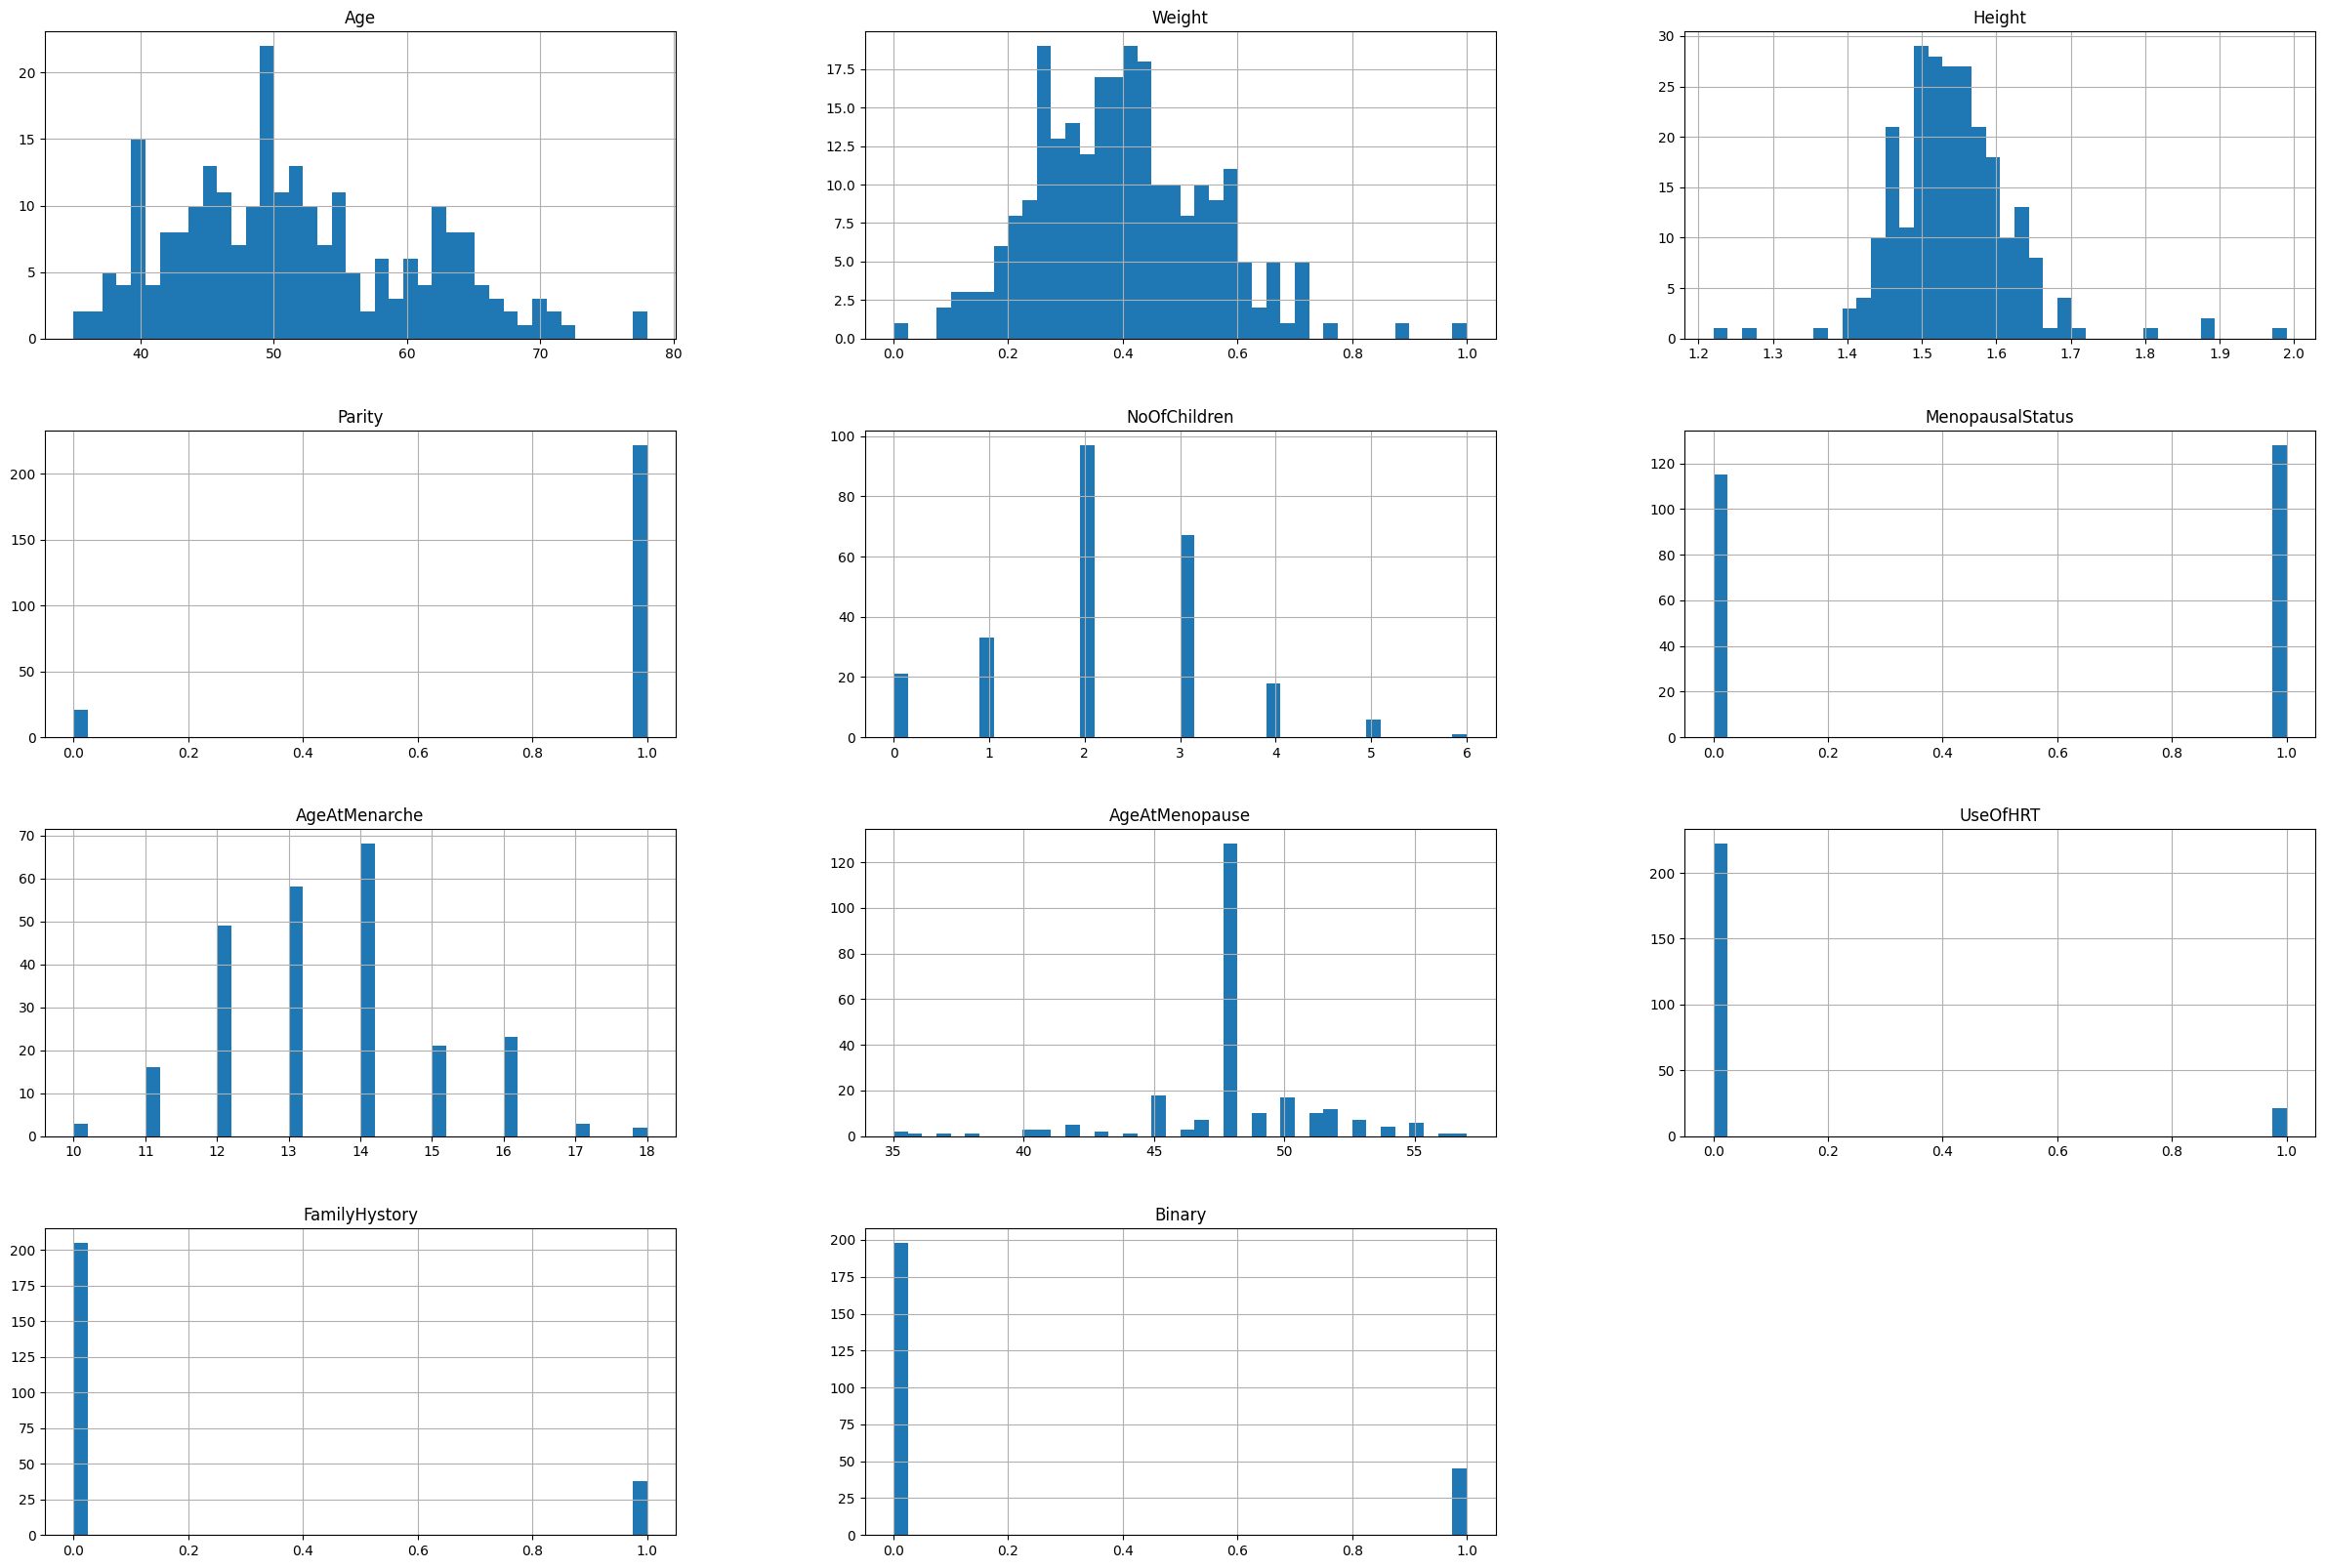

In [20]:
df.hist(bins=40, figsize=(30, 20))

<Axes: >

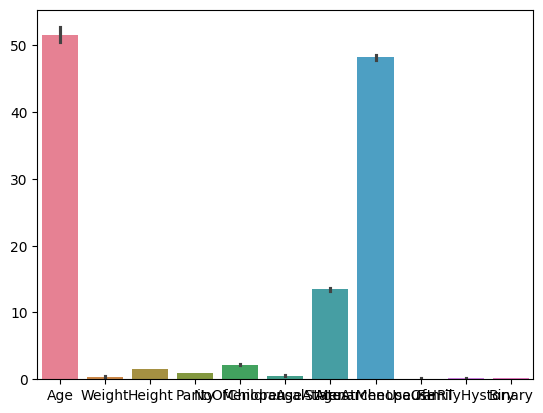

In [24]:
sns.barplot(data=df,linewidth=1)

In [25]:
df['Binary'].value_counts()

Binary
0    198
1     45
Name: count, dtype: int64

In [127]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Split data and Train Models

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Binary'])  
y = df['Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Data Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto'  , random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [28]:
## Logistic Regression
## KNN 
## SVM
## Decision Tree
## Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

In [29]:
## Performing Logistic Regression

import sklearn.metrics as metrics

lr_classifier = LogisticRegression(max_iter=1000)
desc = lr_classifier.fit(X_train, y_train)
print(desc)
y_pred = lr_classifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

LogisticRegression(max_iter=1000)
[[52 11]
 [ 5  5]]
0.7808219178082192
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.31      0.50      0.38        10

    accuracy                           0.78        73
   macro avg       0.61      0.66      0.63        73
weighted avg       0.83      0.78      0.80        73



In [30]:
import sklearn.metrics as metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred))
    print('Recall:\n',metrics.recall_score(y_test, y_pred))

#### KNN

In [31]:
## Performing KNN

knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

desc = knn_classifier.fit(X_train, y_train)
print(desc)
print_model_performance(knn_classifier, X_test, y_test)

KNeighborsClassifier(n_neighbors=4)
Accuracy score:
 0.8767123287671232
Confusion matrix:
 [[57  6]
 [ 3  7]]
Classification report:
               precision    recall  f1-score   support

           0     0.9500    0.9048    0.9268        63
           1     0.5385    0.7000    0.6087        10

    accuracy                         0.8767        73
   macro avg     0.7442    0.8024    0.7678        73
weighted avg     0.8936    0.8767    0.8832        73

Precision:
 0.5384615384615384
Recall:
 0.7


#### SVM

In [32]:
from sklearn import svm
svm_classifier = svm.SVC() #default kernal is Radial Basis Function (RBF) kernel.

svm_classifier.fit(X_train, y_train)
print_model_performance(svm_classifier, X_test, y_test)

Accuracy score:
 0.6986301369863014
Confusion matrix:
 [[42 21]
 [ 1  9]]
Classification report:
               precision    recall  f1-score   support

           0     0.9767    0.6667    0.7925        63
           1     0.3000    0.9000    0.4500        10

    accuracy                         0.6986        73
   macro avg     0.6384    0.7833    0.6212        73
weighted avg     0.8840    0.6986    0.7455        73

Precision:
 0.3
Recall:
 0.9


In [33]:
import sklearn.metrics as metrics

for C in [1, 10, 100, 1000, 10000]:
    for kernal in ['rbf', 'linear', 'poly']:
        svm_classifier = svm.SVC(C=C, kernel=kernal) #similarly, gamma=0.01, 0.5, 
        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'C={C:<10} kernal={kernal:<10} accuracy score={scores: .2%}')

C=1          kernal=rbf        accuracy score= 69.86%
C=1          kernal=linear     accuracy score= 72.60%
C=1          kernal=poly       accuracy score= 65.75%
C=10         kernal=rbf        accuracy score= 68.49%
C=10         kernal=linear     accuracy score= 78.08%
C=10         kernal=poly       accuracy score= 69.86%
C=100        kernal=rbf        accuracy score= 67.12%
C=100        kernal=linear     accuracy score= 76.71%
C=100        kernal=poly       accuracy score= 65.75%
C=1000       kernal=rbf        accuracy score= 69.86%
C=1000       kernal=linear     accuracy score= 78.08%
C=1000       kernal=poly       accuracy score= 75.34%
C=10000      kernal=rbf        accuracy score= 80.82%
C=10000      kernal=linear     accuracy score= 82.19%
C=10000      kernal=poly       accuracy score= 79.45%


<Axes: >

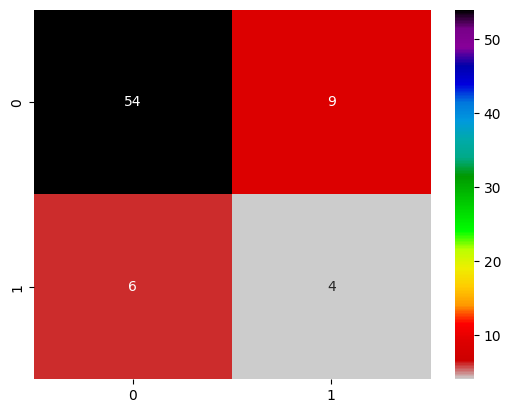

In [34]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='nipy_spectral_r')

<Axes: >

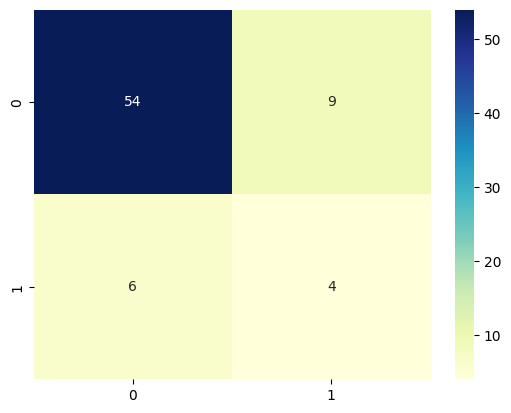

In [35]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')  #cmap = Blues

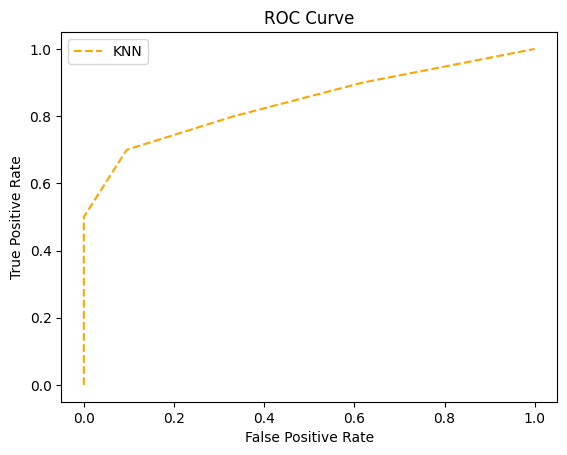

In [36]:
from sklearn.metrics import roc_curve

pred_prob = knn_classifier.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNN')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Decision Tree

In [37]:
## Performing Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=17)   
dt_classifier.fit(X_train,y_train)

print(dt_classifier)
print_model_performance(dt_classifier, X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
Accuracy score:
 0.6712328767123288
Confusion matrix:
 [[42 21]
 [ 3  7]]
Classification report:
               precision    recall  f1-score   support

           0     0.9333    0.6667    0.7778        63
           1     0.2500    0.7000    0.3684        10

    accuracy                         0.6712        73
   macro avg     0.5917    0.6833    0.5731        73
weighted avg     0.8397    0.6712    0.7217        73

Precision:
 0.25
Recall:
 0.7


In [38]:
#Hyperparameter training with iterations
import sklearn.metrics as metrics

for md in range(1, 11, 1):
    for crt in ['gini', 'entropy']:
        dt_classifier = DecisionTreeClassifier(criterion=crt, max_depth=md, random_state=17)   
        dt_classifier.fit(X_train,y_train)
        y_pred = dt_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'k={md:<4} criterion={crt:<10} accuracy score={scores: .2%}')

k=1    criterion=gini       accuracy score= 42.47%
k=1    criterion=entropy    accuracy score= 34.25%
k=2    criterion=gini       accuracy score= 78.08%
k=2    criterion=entropy    accuracy score= 72.60%
k=3    criterion=gini       accuracy score= 76.71%
k=3    criterion=entropy    accuracy score= 72.60%
k=4    criterion=gini       accuracy score= 86.30%
k=4    criterion=entropy    accuracy score= 65.75%
k=5    criterion=gini       accuracy score= 76.71%
k=5    criterion=entropy    accuracy score= 72.60%
k=6    criterion=gini       accuracy score= 75.34%
k=6    criterion=entropy    accuracy score= 65.75%
k=7    criterion=gini       accuracy score= 79.45%
k=7    criterion=entropy    accuracy score= 67.12%
k=8    criterion=gini       accuracy score= 80.82%
k=8    criterion=entropy    accuracy score= 75.34%
k=9    criterion=gini       accuracy score= 80.82%
k=9    criterion=entropy    accuracy score= 75.34%
k=10   criterion=gini       accuracy score= 82.19%
k=10   criterion=entropy    acc

In [39]:
from sklearn.tree import export_text

r = export_text(dt_classifier, feature_names=list(X.columns))
print(r)

|--- Weight <= 0.47
|   |--- Age <= 52.50
|   |   |--- Weight <= 0.21
|   |   |   |--- Age <= 39.50
|   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  37.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  39.50
|   |   |   |   |--- class: 1
|   |   |--- Weight >  0.21
|   |   |   |--- AgeAtMenarche <= 13.50
|   |   |   |   |--- AgeAtMenopause <= 49.27
|   |   |   |   |   |--- Height <= 1.61
|   |   |   |   |   |   |--- Height <= 1.50
|   |   |   |   |   |   |   |--- Height <= 1.42
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Height >  1.42
|   |   |   |   |   |   |   |   |--- Height <= 1.47
|   |   |   |   |   |   |   |   |   |--- Weight <= 0.27
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Weight >  0.27
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Height >  1.47
|   |   |   |   |   |   |   |   |   |--- 

#### Random Forest Classifier

In [40]:
## Performing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print_model_performance(rf_classifier, X_test, y_test)

Accuracy score:
 0.9041095890410958
Confusion matrix:
 [[60  3]
 [ 4  6]]
Classification report:
               precision    recall  f1-score   support

           0     0.9375    0.9524    0.9449        63
           1     0.6667    0.6000    0.6316        10

    accuracy                         0.9041        73
   macro avg     0.8021    0.7762    0.7882        73
weighted avg     0.9004    0.9041    0.9020        73

Precision:
 0.6666666666666666
Recall:
 0.6


In [41]:
for md in range(1, 15, 1):
    for crt in ['gini', 'entropy']:
        rf_classifier = RandomForestClassifier(criterion=crt, max_depth=md)
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)
        scores = metrics.accuracy_score(y_test, y_pred)
        print(f'k={md:<4} criterion={crt:<10} accuracy score={scores: .3%}')

k=1    criterion=gini       accuracy score= 79.452%
k=1    criterion=entropy    accuracy score= 86.301%
k=2    criterion=gini       accuracy score= 87.671%
k=2    criterion=entropy    accuracy score= 86.301%
k=3    criterion=gini       accuracy score= 84.932%
k=3    criterion=entropy    accuracy score= 84.932%
k=4    criterion=gini       accuracy score= 86.301%
k=4    criterion=entropy    accuracy score= 84.932%
k=5    criterion=gini       accuracy score= 87.671%
k=5    criterion=entropy    accuracy score= 84.932%
k=6    criterion=gini       accuracy score= 84.932%
k=6    criterion=entropy    accuracy score= 86.301%
k=7    criterion=gini       accuracy score= 86.301%
k=7    criterion=entropy    accuracy score= 87.671%
k=8    criterion=gini       accuracy score= 87.671%
k=8    criterion=entropy    accuracy score= 87.671%
k=9    criterion=gini       accuracy score= 90.411%
k=9    criterion=entropy    accuracy score= 86.301%
k=10   criterion=gini       accuracy score= 87.671%
k=10   crite

#### Finally, The Best Choosen Model is Random Forest Classifier as its accuracy is more than the other models which is 90%.